# EDA with python and logistic regression

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

import libraries

In [83]:
import pandas as pd #read the data and data preprocessing step done by panda
import numpy as np #work withhe array multi dimentional or singe dimentional array
import matplotlib.pyplot as plt #visualisation
import seaborn as sns            #visualisation + statical ()
%matplotlib inline

In [84]:
#import data

In [85]:
train = pd.read_csv('titanic_dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#missing data

In [87]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

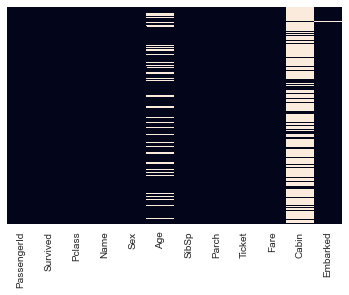

In [88]:
# seaborn --hatmp
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [89]:
#count the no of survived and not survived

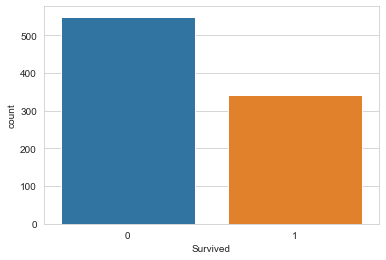

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,data=train)

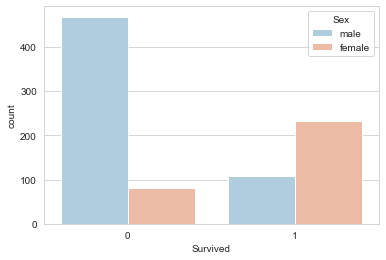

In [91]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,hue='Sex',data=train,palette='RdBu_r')

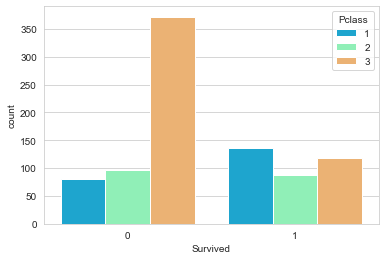

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,hue='Pclass',data=train,palette='rainbow')

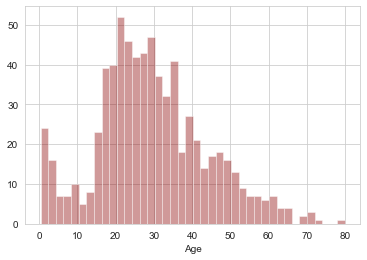

In [93]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

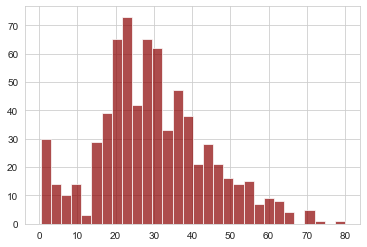

In [94]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

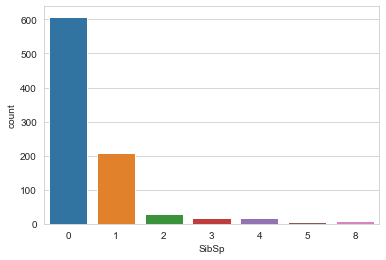

In [95]:
#countplot of sibilingand spouse
sns.countplot(x='SibSp',data=train)

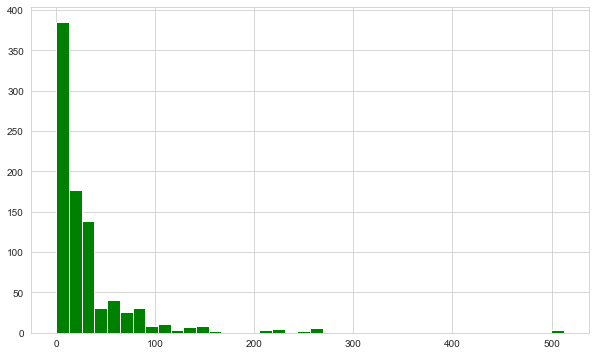

In [96]:
train['Fare'].hist(color='green',bins=40,figsize=(10,6))

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

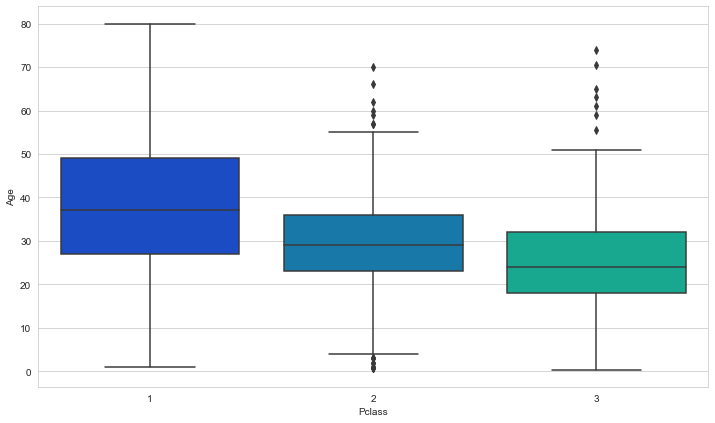

In [97]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [98]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [99]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

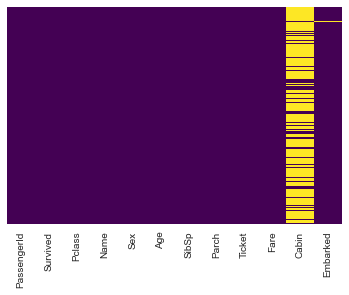

In [100]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

the Cabin column and the row in Embarked that is NaN....a lotf future engneering needed to be done on cabin column

In [101]:
train.drop('Cabin',axis=1,
           inplace=True)

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


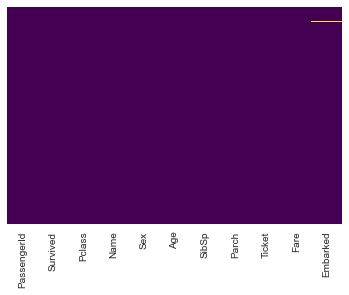

In [103]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [104]:
sex =  pd.get_dummies(train['Sex'],drop_first=True).head()
embark = pd.get_dummies(train['Embarked'],drop_first=True).head()

In [105]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


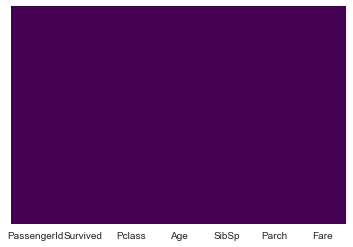

In [106]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
train = pd.concat([train,sex,embark],axis=1)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [109]:
#survived col is th dependent and al oth are independent

# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split

In [110]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [111]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split


In [117]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),  train['Survived'], test_size=0.30,random_state=101)